In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import splrep
from scipy.interpolate import splev
from scipy.interpolate import UnivariateSpline
from matplotlib.gridspec import GridSpec
from gekko import GEKKO

In [2]:
def vis_logprob(dados):
    x = np.sort(dados)
    y = np.arange(1, len(x)+1)/len(x)
    
    fig = plt.figure(figsize=(9,5))
    
    plt.grid(True, which="both")
    
    plt.axhline(np.median(dados), linestyle='--', label='Mediana', color='green', linewidth=0.5)
    plt.axhline(np.mean(dados), linestyle='--', label='Média', color='red', linewidth=0.5)
    plt.semilogy(y[::-1], x, 'o', markersize=1.5)
    plt.axvline(0.047, linestyle='--', color='orange', label='Limiar de Anomalia', linewidth=0.5)
    #plt.plot(0.073, 25.19, 'x', color='blue', label='Ponto de Inflexão')
    #plt.plot(0.32, 5.13, 'x', color='blue')
    plt.title(str(dados.name) +' Log x Probabilidade Acumulada')
    plt.xlabel('Probabilidade (%)')
    plt.ylabel(str(dados.name))
    plt.legend()
    
    plt.show()
    
    return x, y

<IPython.core.display.Javascript object>


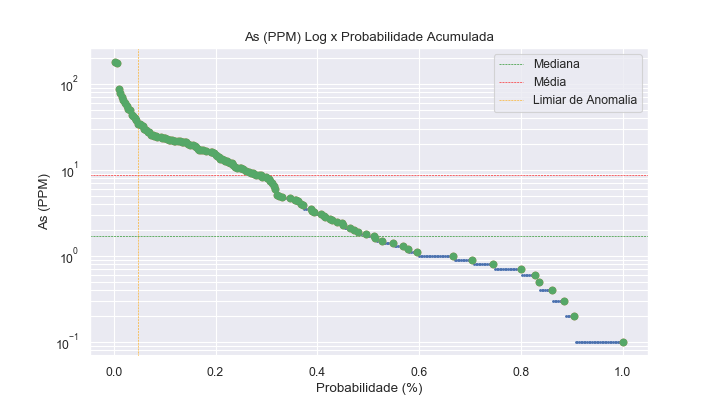

In [110]:
dados = pd.read_excel('C:/Users/Pedro/Documents/Ufrj/Exploração Mineral/PMAsBi/Para de Minas2.xls')
dados_bi = dados['Bi (PPM)']
dados_as = dados['As (PPM)']

x, y = vis_logprob(dados_as)

In [112]:
xy = pd.DataFrame()
xy.insert(loc=0, column='Teor', value=x)
xy.insert(loc=1, column='Prob', value=y[::-1])
xy.drop_duplicates(subset='Teor', inplace=True)

plt.semilogy(xy.Prob, xy.Teor, 'o')
plt.show()

In [61]:
spl = splrep(xy.Prob[::-1], xy.Teor[::-1], k=3)

x2 = np.linspace(0, 1, 150)   # Corresponde ao valor de x no spl
y2 = splev(x2[1::], spl)

## Python Gekko

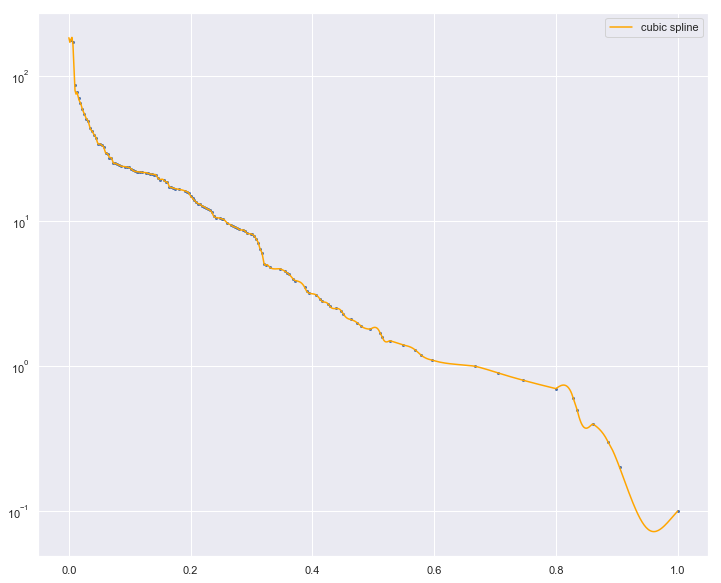

In [116]:
fig = plt.figure(figsize=(12,10))

xm = np.array(xy.Prob[::-1])
ym = np.array(xy.Teor[::-1])

m = GEKKO()             # create GEKKO model
m.options.IMODE = 2     # solution mode
x = m.Param(value=np.linspace(0,1,600))   # prediction points
y = m.Var()             # prediction results
m.cspline(x, y, xm, ym) # cubic spline
m.solve(disp=False)     # solve

# create plot
plt.semilogy(xm,ym,'bo', markersize=2)
plt.semilogy(x.value,y.value,label='cubic spline', color='orange')
plt.legend(loc='best')

## Patsy

In [76]:
from patsy import dmatrix, build_design_matrices

<IPython.core.display.Javascript object>


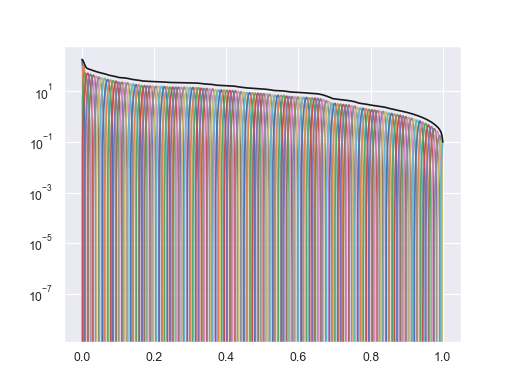

In [113]:
%matplotlib notebook

x = np.linspace(0., 1., 600)

y = dmatrix("bs(x, df=130, degree=3, include_intercept=True) - 1", {"x": x})

# define  some coefficients
b = np.array(xy.Teor)

# B-spline basis functions (colored curves) each multiplied by its coeff
plt.semilogy(x, y*b[::-1]);

# he spline itself (sum of the basis functions, thick black curve)
plt.semilogy(x, np.dot(y, b)[::-1], color='k', linewidth=1.5);

In [88]:
b.shape

(130,)

In [89]:
len(xy.Teor)

130

In [90]:
len(xy.Prob)

130

<IPython.core.display.Javascript object>


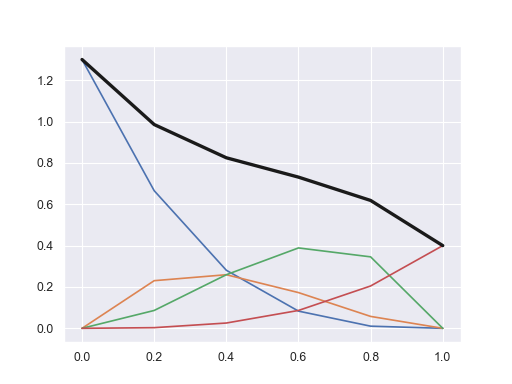

In [108]:
x = np.linspace(0., 1., 6)

y = dmatrix("bs(x, df=4, degree=3, include_intercept=True) - 1", {"x": x})


b = np.array([1.3, 0.6, 0.9, 0.4])


plt.plot(x, y*b);


plt.plot(x, np.dot(y, b), color='k', linewidth=3);

In [115]:
%matplotlib inline